# 北京理工大学-2024研究生课程-数据挖掘-互评作业1: 数据探索性分析与数据预处
姓名：周永扬    学号：3220231274
## 1. 问题描述
本次作业中，自行选择2个数据集进行探索性分析与预处理。
## 2. 数据集
选择**GitHub Dataset** [https://www.kaggle.com/datasets/nikhil25803/github-dataset?select=repository_data.csv]以及**Movies Dataset from Pirated Sitest**[https://www.kaggle.com/datasets/arsalanrehman/movies-dataset-from-piracy-websiten]进行分析

## 3.1 GitHub Dataset数据集探索性分析与预处理
首先进行包导入以及数据的读取。

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# 进行数据读入
github_dataset = pd.read_csv("dataset/Github_Dataset/github_dataset.csv")

读取数据后，进行整体分析，包括数据整体的形状、前几行数据的内容

In [30]:
# 整体形状
print("github_dataset shape: {}".format(github_dataset.shape))
# 前几行数据内容
print("github_dataset head:")
print(github_dataset.head())
print("github_dataset colums")
print(github_dataset.columns)

github_dataset shape: (1052, 7)
github_dataset head:
                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
github_dataset colums
Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')


对于github_dataset来说，一共有7个属性，其中标称属性有：respositories以及language。其余5项stars_count, forks_count, issues_count, pull_requests, contributors为数值属性。
下面统计标称属性的频数，数值属性的五数概括以及统计缺失值的个数。

In [4]:
# 对respositories属性进行频数统计
print(github_dataset['repositories'].value_counts())
print("\n")
# 对language属性进行频数统计
print(github_dataset['language'].value_counts())


kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64


JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C     

In [5]:
# 对stars_count, forks_count, issues_count, pull_requests, contributors进行五数概括以及缺失值个数
print("DESCRIBE: \n{}\n".format(github_dataset.describe()))

# 统计缺失值个数
print("NULL COUNT: \n{}\n".format(github_dataset.isnull().sum()))

DESCRIBE: 
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

NULL COUNT: 
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64



以上完成了对数据的初步统计，下面将进行初步可视化进行分析处理。对于数值属性stars_count, forks_count, issues_count, pull_requests, contributors进行盒图和直方图绘制。图表一共5行两列，左边为直方图，右边为盒图。具体的属性标注在x轴的label上。

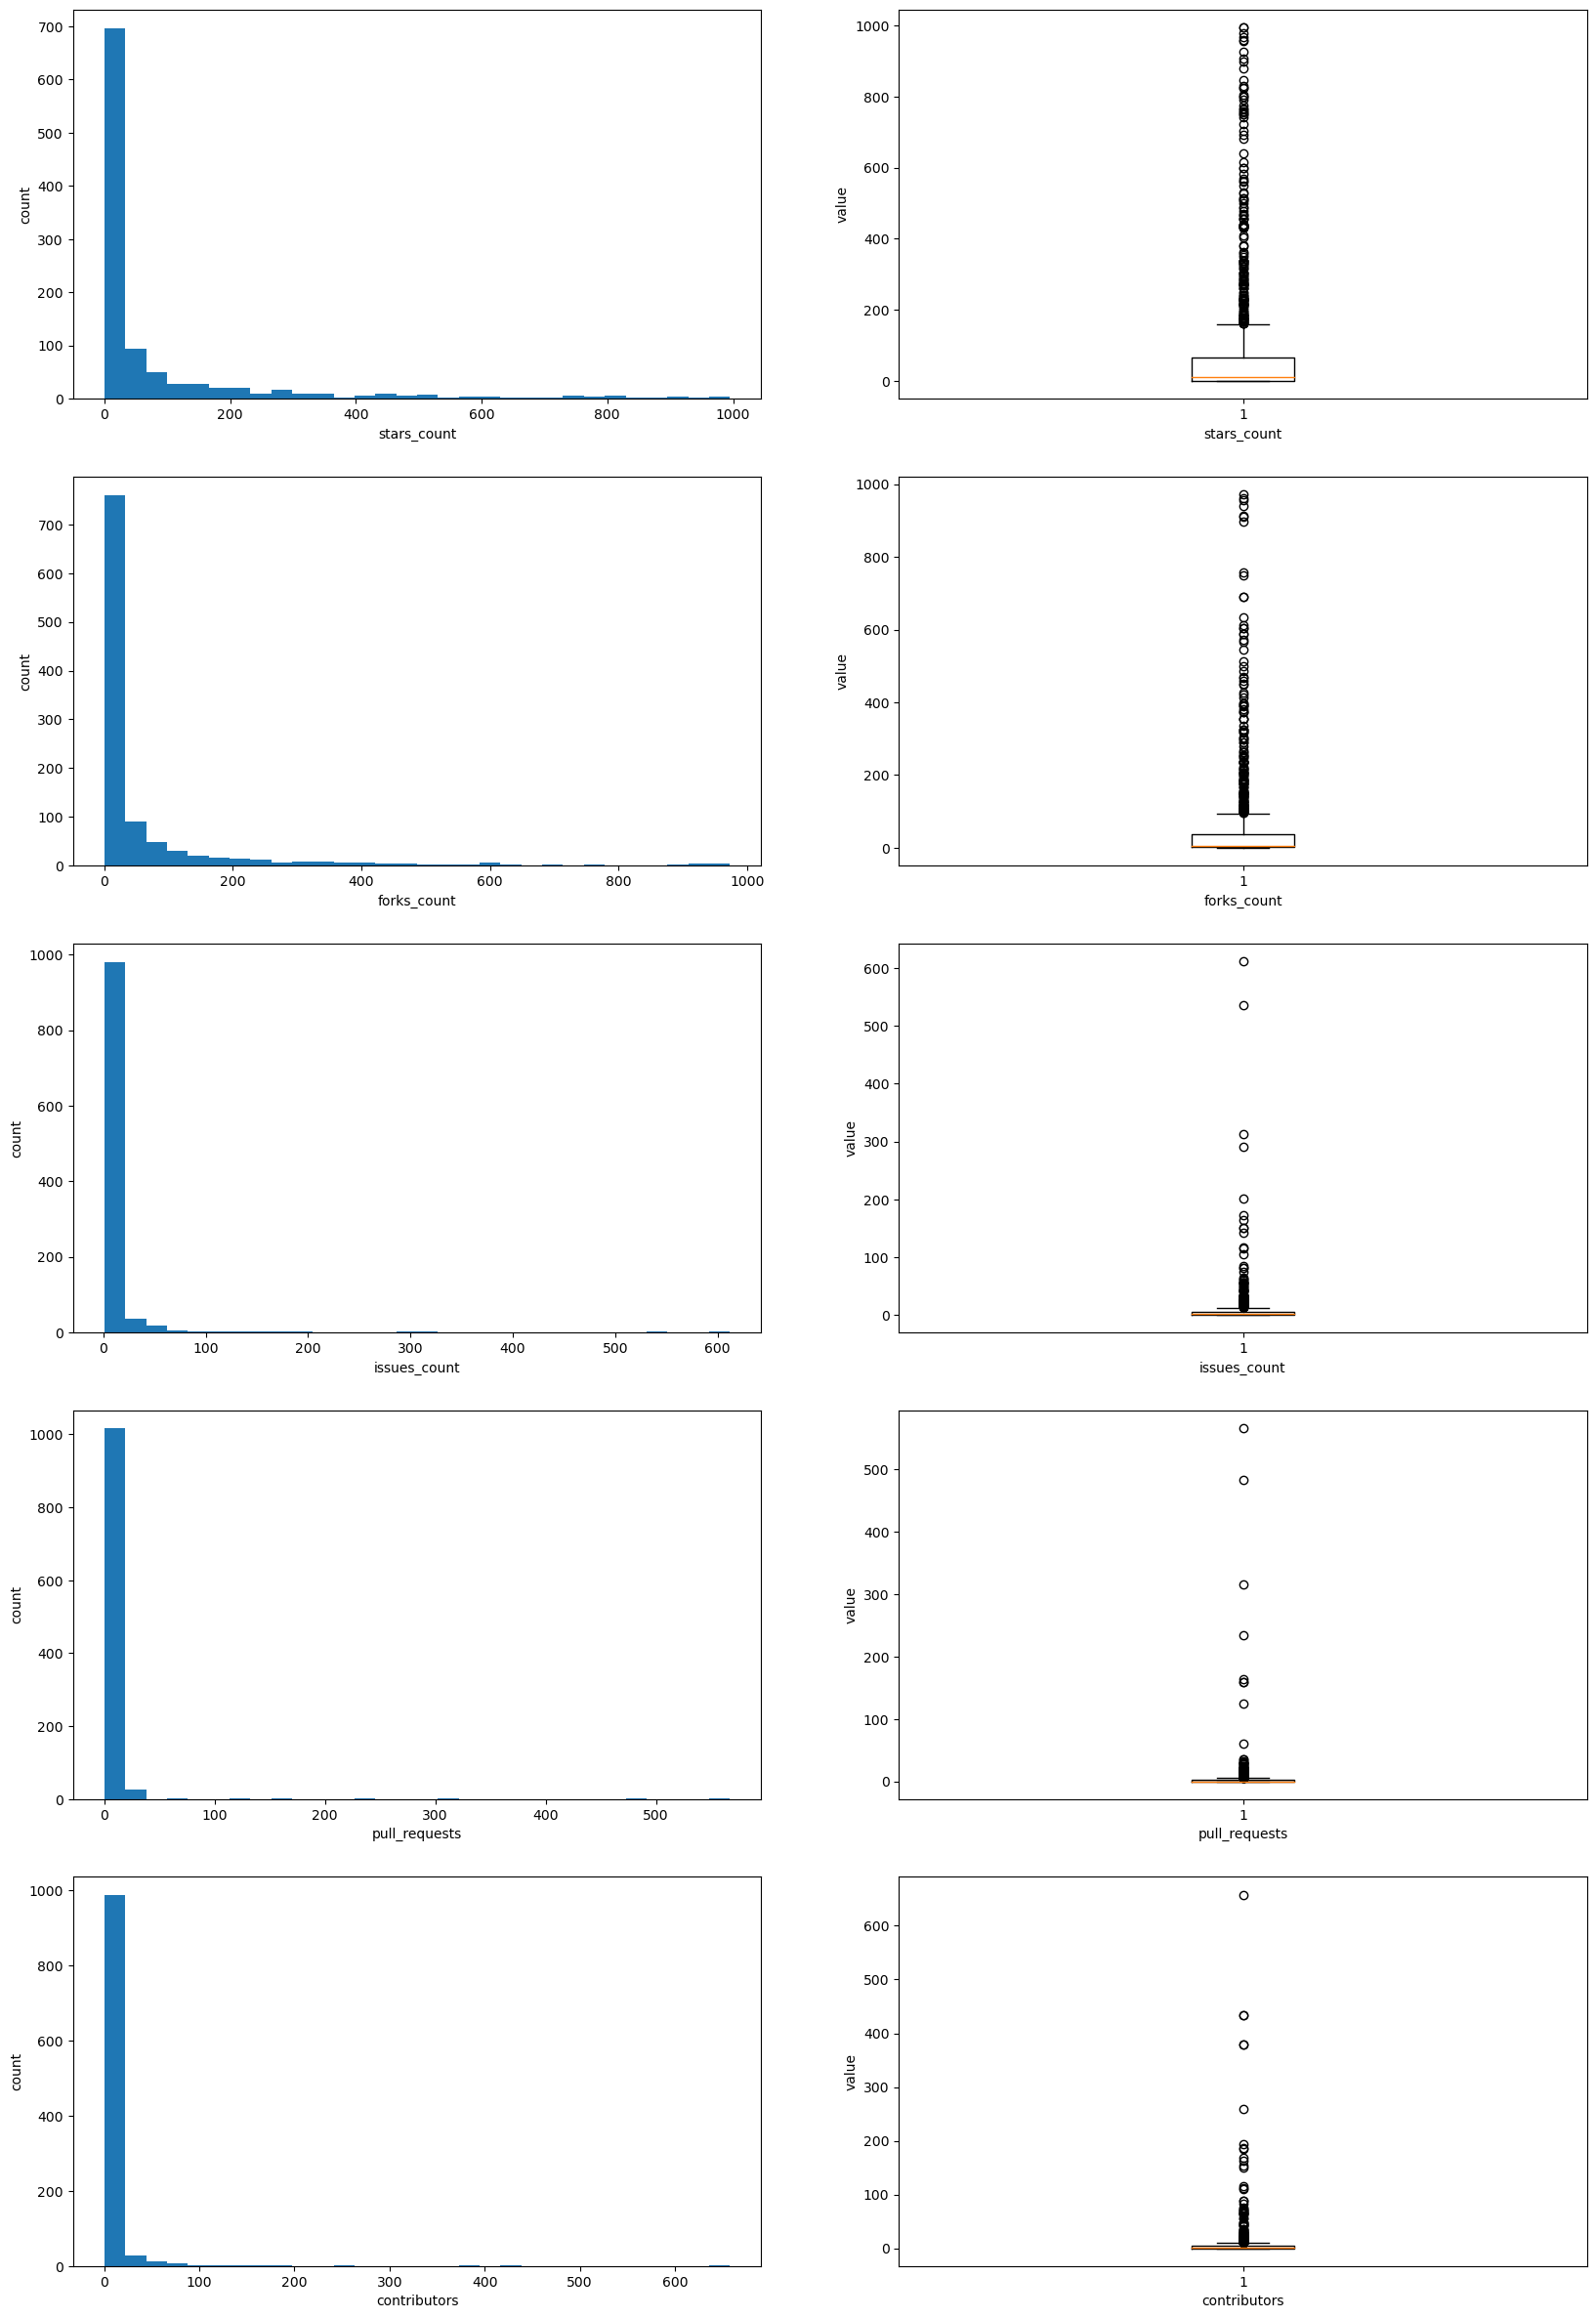

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,30))
attribute_list = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
for idx, attribute in enumerate(attribute_list):
    # 直方图
    axes[idx, 0].hist(github_dataset[attribute], bins=30)
    axes[idx, 0].set_xlabel(attribute)
    axes[idx, 0].set_ylabel('count')
    # 盒图
    axes[idx, 1].boxplot(github_dataset[attribute])
    axes[idx, 1].set_xlabel(attribute)
    axes[idx, 1].set_ylabel('value')
plt.show()

下面进行对缺失数据的处理。该数据集中，仅有“language”属性存在 缺失值。该属性值指的是对应代码库使用的计算机语言。缺失原因可能有：1.本身没有使用编程语言，为纯文件。2. 统计、爬取数据时产生了遗漏。3. 使用的语言内容不再github对应的语言库中。
对于给出的四种填补方案，该Language属性能够以前两种进行处理，而后两种并不符合language属性本身的特点
因此采用：1. 将缺失部分剔除。以及2. 用最高频率值填补缺失值。两种方案进行处理比对。
下面首先采用剔除方法。

In [7]:
# 1. 剔除缺失部分。
github_dataset_dropNaN = github_dataset.dropna()
# 查看剔除效果
print("剔除结果:\n{}\n".format(github_dataset_dropNaN.isna().sum()))
# 与原始结果对比
print("原始结果五数概括:\n{}\n".format(github_dataset.describe()))
print("剔除结果五数概括:\n{}\n".format(github_dataset_dropNaN.describe()))


剔除结果:
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

原始结果五数概括:
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

剔除结果五数概括:
       stars_count  forks_count  issues_count  pull_requests  contributors
count   907.000000   907.000000    907.000000     907.000000    907.000000
m

下面采用最高频率替代。

In [8]:
# 2. 最高频率替代。
attribute = 'language'
mode_values = github_dataset[attribute].mode().iloc[0]  # 获取属性的频率最高的值
language_col = github_dataset[attribute]
language_col = language_col.fillna(mode_values)
github_dataset_highFreqReplace = github_dataset
github_dataset_highFreqReplace[attribute] = language_col

# 查看替换结果
print("替换结果:\n{}\n".format(github_dataset_highFreqReplace.isna().sum()))
# 与原始结果对比
print("原始结果五数概括:\n{}\n".format(github_dataset.describe()))
print("替换结果五数概括:\n{}\n".format(github_dataset_highFreqReplace.describe()))

替换结果:
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

原始结果五数概括:
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

替换结果五数概括:
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
m

## 3.2 Movies Dataset from Pirated Sitest分析

首先进行数据的读取。该数据集仅有一个.csv文件。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# 进行数据读入
movie_dataset = pd.read_csv("dataset/Movies-Dataset/movies_dataset.csv")

In [10]:
# 整体形状
print("movie_dataset shape: {}".format(movie_dataset.shape))
# 前几行数据内容
print("movie_dataset head:")
print(movie_dataset.head())
print("movie_dataset colums")
print(movie_dataset.columns)
# 对title属性进行频数统计

movie_dataset shape: (20548, 15)
movie_dataset head:
   Unnamed: 0  IMDb-rating appropriate_for      director downloads      id  \
0           0          4.8               R     John Swab       304  372092   
1           1          6.4           TV-PG   Paul Ziller        73  372091   
2           2          5.2               R  Ben Wheatley     1,427  343381   
3           3          8.1             NaN  Venky Atluri     1,549  372090   
4           4          4.6             NaN  Shaji Kailas       657  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

         

从前几行可以看出，该数据集存在比较严重的数据不合理情况，例如第一列Unnamed: 0属性未知其含义。downloads, views采用字符串存储数值。run_time存在部分以数字，部分以x h y min的形式记录时长。首先需要进行一些出具的规范化操作。
1. 去除无意义的Unnamed: 0列。
2. 将downloads和views转换为数值属性。
2. 将run_time转换为统一的数值属性。 

In [11]:
# 去除Unnamed: 0列
movie_dataset_new = movie_dataset.drop('Unnamed: 0', axis=1)
print("去除 Unnamed:0 列后:")
print(movie_dataset_new.head())

去除 Unnamed:0 列后:
   IMDb-rating appropriate_for      director downloads      id  \
0          4.8               R     John Swab       304  372092   
1          6.4           TV-PG   Paul Ziller        73  372091   
2          5.2               R  Ben Wheatley     1,427  343381   
3          8.1             NaN  Venky Atluri     1,549  372090   
4          4.6             NaN  Shaji Kailas       657  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Ca

In [12]:

#取出 downloads列，转换为整数然后替换回去, 对于downloads的NaN,暂时替换为-1，之后改为NaN
downloads_col = movie_dataset['downloads']
downloads_col = downloads_col.fillna("-1")
downloads_col = downloads_col.str.replace(',','').astype(int)
downloads_col = downloads_col.replace(-1, np.nan)

#取出 views列，转换为整数然后替换回去, 对于views的NaN,暂时替换为-1，之后改为NaN
views_col = movie_dataset['views']
views_col = views_col.fillna("-1")
views_col = views_col.str.replace(',','').astype(int)
views_col = views_col.replace(-1, np.nan)

movie_dataset_new['views'] = views_col
movie_dataset_new['downloads'] = downloads_col
print("规范化downloads以及views后:")
print(movie_dataset_new.head())

规范化downloads以及views后:
   IMDb-rating appropriate_for      director  downloads      id  \
0          4.8               R     John Swab      304.0  372092   
1          6.4           TV-PG   Paul Ziller       73.0  372091   
2          5.2               R  Ben Wheatley     1427.0  343381   
3          8.1             NaN  Venky Atluri     1549.0  372090   
4          4.6             NaN  Shaji Kailas      657.0  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th.

In [13]:
# 将run_time列规范为min表示
run_time_col = movie_dataset['run_time']
print(run_time_col.tail())
#转换函数
def convert_runtime_to_minutes(runtime : str):
    hours = 0
    min = 0
    if pd.isna(runtime):
        return

    if 'h' in runtime and 'min' in runtime:
        parts = runtime.split(' ')
        hours = int(parts[0].split('h')[0])
        min = int(parts[1].split('min')[0])
    elif 'min' in runtime:
        parts = runtime.split('min')
        min = int(parts[0])
    elif 'h' in runtime:
        parts = runtime.split('h')
        hours = int(parts[0])
    else:
        min = int(runtime)
    return hours*60 + min

run_time_col_new = run_time_col.apply(convert_runtime_to_minutes)
movie_dataset_new['run_time'] = run_time_col_new

print("规范化run_time后:")
print(movie_dataset_new.head())

20543         NaN
20544         159
20545    1h 50min
20546         NaN
20547         NaN
Name: run_time, dtype: object
规范化run_time后:
   IMDb-rating appropriate_for      director  downloads      id  \
0          4.8               R     John Swab      304.0  372092   
1          6.4           TV-PG   Paul Ziller       73.0  372091   
2          5.2               R  Ben Wheatley     1427.0  343381   
3          8.1             NaN  Venky Atluri     1549.0  372090   
4          4.6             NaN  Shaji Kailas      657.0  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023     105.0   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023      84.0   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021     107.0   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023     139.0   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023     122.

完成以上工作后，进行数据摘要以及可视化工作。
对于该数据集，IMDb-rating, downloads, run_time, views为数值属性。其他都为标称属性。其中id为唯一属性，short line无统计频数意义，不进行处理。

In [14]:
# 标称属性处理
norminal_attribute_list = ['appropriate_for', 'director',
       'industry', 'language', 'posted_date', 'release_date', 'title', 'writer']

for attribute in norminal_attribute_list:
    print("\nattribute:{}\n".format(attribute))
    print(movie_dataset_new[attribute].value_counts())


attribute:appropriate_for

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

attribute:director

Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shiv

以上为标称属性频数统计，下面给出数值属性的五数概括以及缺失值个数。

In [15]:
# 数值属性处理
numeric_attribute_list = ['views', 'downloads', 'run_time', 'IMDb-rating']
for attribute in numeric_attribute_list:
    print("\n attribute:{}\n".format(attribute))
    print(movie_dataset_new[attribute].describe())


 attribute:views

count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max      1.638533e+06
Name: views, dtype: float64

 attribute:downloads

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64

 attribute:run_time

count    18780.000000
mean       106.195793
std         23.636328
min          2.000000
25%         90.000000
50%        100.000000
75%        117.000000
max        321.000000
Name: run_time, dtype: float64

 attribute:IMDb-rating

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64


下面进行数据可视化工作，首先给出数值属性的直方图以及盒图。

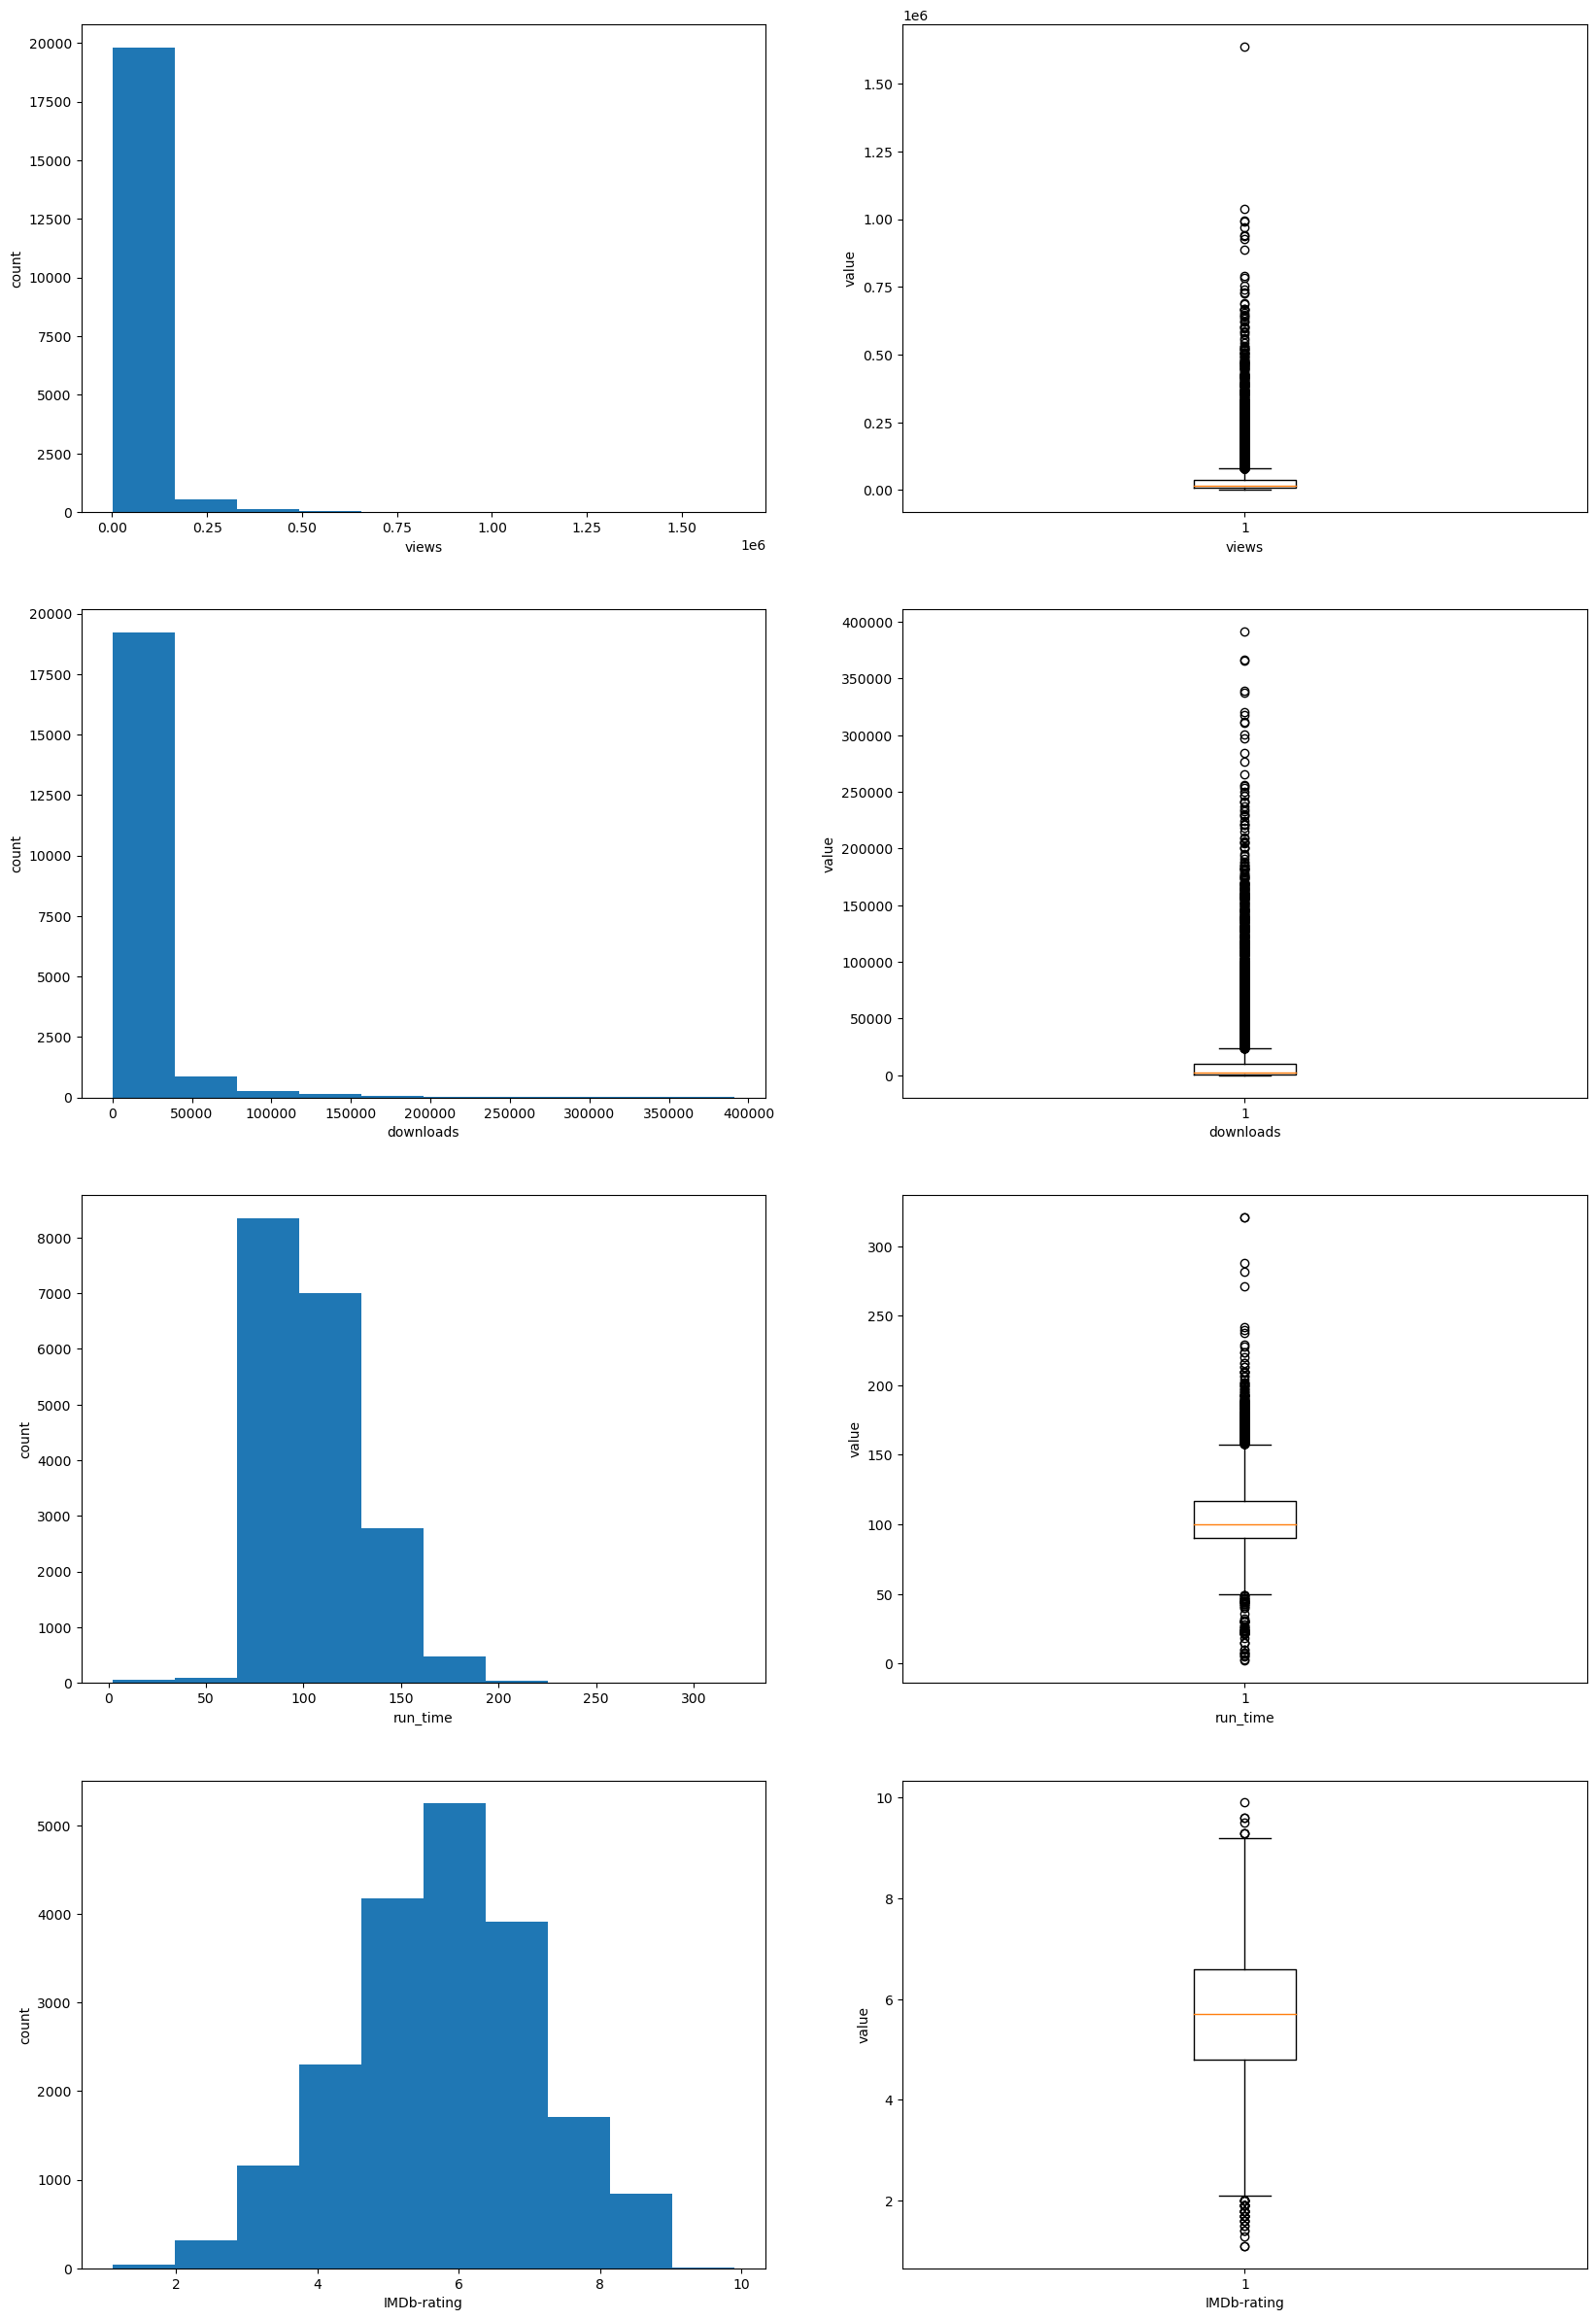

In [16]:
# 为了绘制，在绘图时剔除nan值。

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))
for idx, attribute in enumerate(numeric_attribute_list):
    # 直方图
    axes[idx, 0].hist(movie_dataset_new[attribute], bins=10)
    axes[idx, 0].set_xlabel(attribute)
    axes[idx, 0].set_ylabel('count')
    # 盒图
    data_col = movie_dataset_new[attribute]
    data_col = data_col.dropna()
    axes[idx, 1].boxplot(data_col)
    axes[idx, 1].set_xlabel(attribute)
    axes[idx, 1].set_ylabel('value')
plt.show()

下面给出appropriate_for, industry, language三个标称属性的直方图。

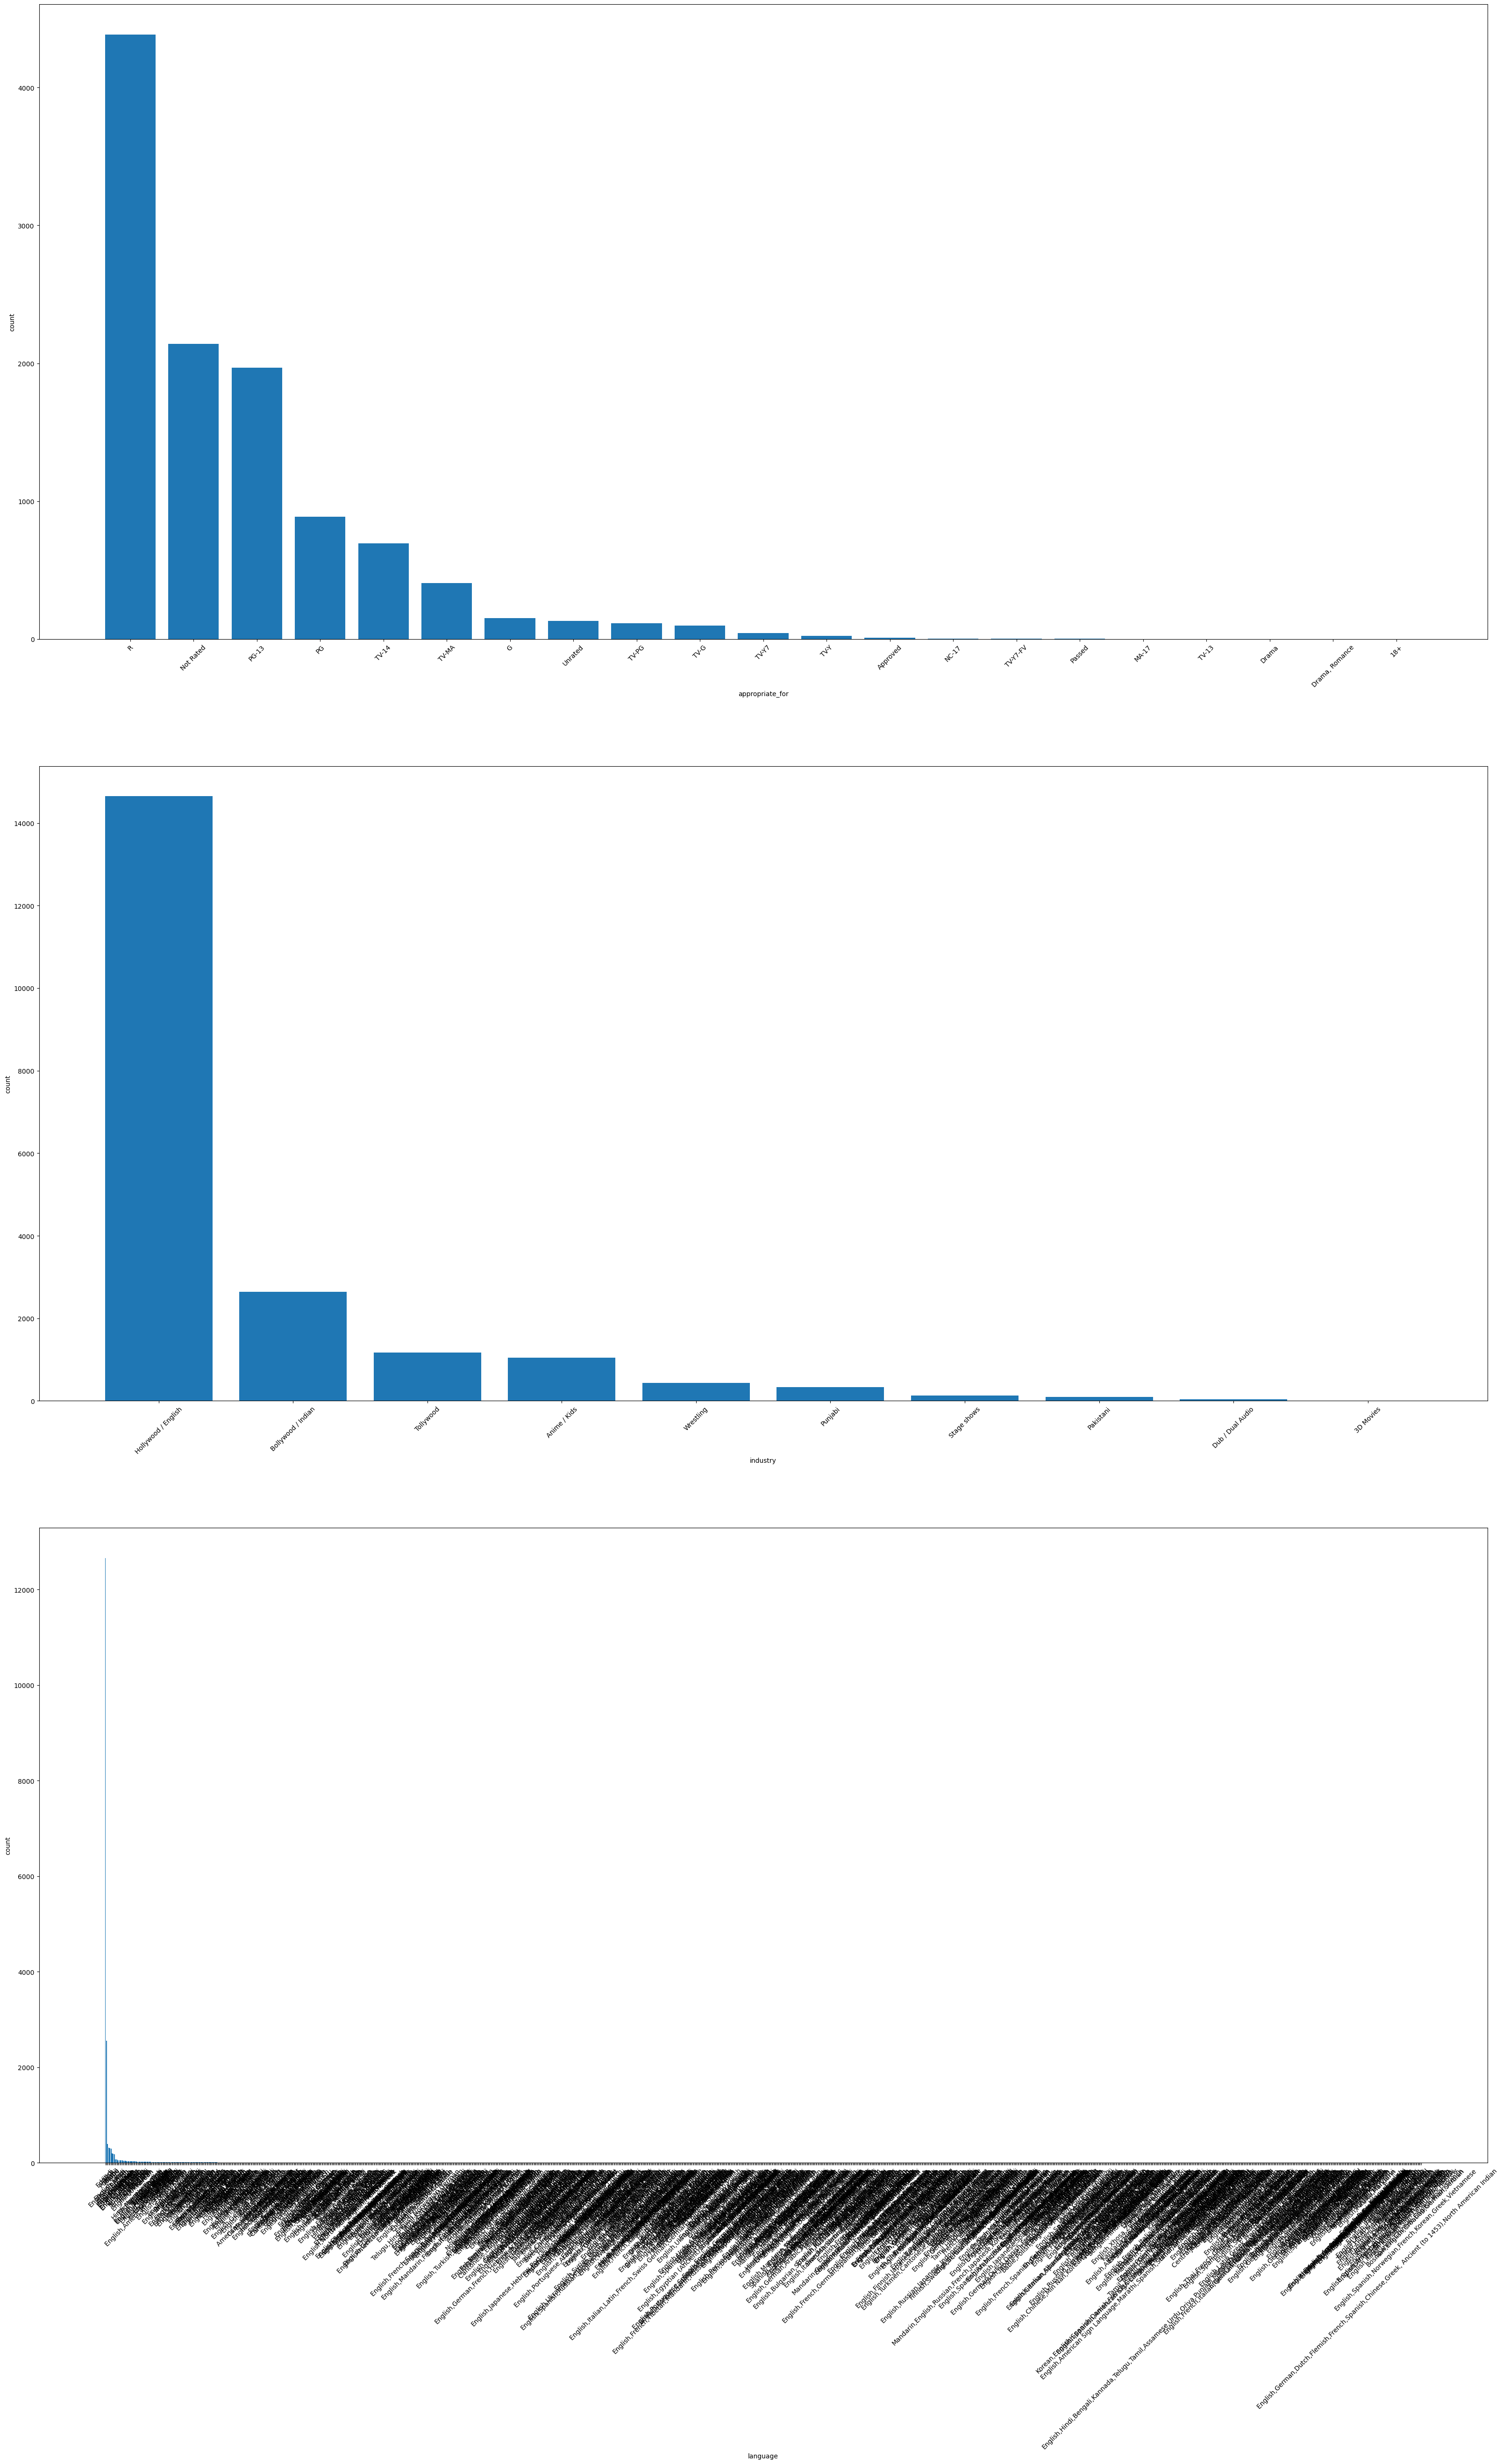

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(40,60))
attribute_lite = ['appropriate_for', 'industry', 'language']
for idx, attribute in enumerate(attribute_lite):
    attribute_counts = movie_dataset_new[attribute].value_counts()
    axes[idx].bar(attribute_counts.index, attribute_counts.values)
    axes[idx].set_xlabel(attribute)
    axes[idx].set_ylabel('count')
    axes[idx].tick_params(axis='x', rotation=45)
plt.show()

下面进行对缺失数据的处理。首先需要确定哪些数据列存在缺失值。

In [18]:
print("NaN Check: \n{}\n".format(movie_dataset_new.isna().sum()))

NaN Check: 
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64



以上可以看到除了id以外的属性都存在NaN值。对于不同的数据，采用不同的处理方案。对于仅有一个数据项丢失的数据，就不进行额外的分析了，直接采用丢弃的方案。对于缺失较多的数据IMDb-rating，appropriate_for，director，language，run_time，storyline，writer进行丢失原因分析。
对于IMDb-rating丢失可能为该电影并未提供评分，或是爬取丢失。采取剔除方法。

对于appropriate_for，该数据缺损较多，可能为电影所在地区没有评级制度，采取最高频率值补充。

对于language，可能存在无语言默片或者部分难以确认的小语种，采用剔除方法。

对于run_time以及storyline，存在电影没有片源，没有简介的情况，采用剔除方法。

对于writer，由于可能为匿名，且网络撰写者不一定会署名，采用最高频率值填充。

In [19]:
#首先进行替换
replace_attribute = ['appropriate_for', 'writer']
movie_dataset_fillna = movie_dataset_new
for attribute  in replace_attribute:
    mode_values = movie_dataset_new[attribute].mode().iloc[0]  # 获取属性的频率最高的值
    movie_dataset_fillna[attribute] = movie_dataset_new[attribute].fillna(mode_values)

# 查看替换结果
print("替换结果:\n{}\n".format(movie_dataset_fillna.isna().sum()))
# 与原始结果对比
print("原始结果五数概括:\n{}\n".format(movie_dataset_new.describe()))
print("替换结果五数概括:\n{}\n".format(movie_dataset_fillna.describe()))

#之后进行剔除
movie_dataset_fillna = movie_dataset_fillna.dropna()
print("替换结果:\n{}\n".format(movie_dataset_fillna.isna().sum()))
# 与原始结果对比
print("原始结果五数概括:\n{}\n".format(movie_dataset_new.describe()))
print("替换结果五数概括:\n{}\n".format(movie_dataset_fillna.describe()))

替换结果:
IMDb-rating         841
appropriate_for       0
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer                0
dtype: int64

原始结果五数概括:
        IMDb-rating      downloads             id      run_time         views
count  19707.000000   20547.000000   20548.000000  18780.000000  2.054700e+04
mean       5.762151   10795.238916  222351.199776    106.195793  3.559551e+04
std        1.374041   23716.181987  138422.327931     23.636328  6.247242e+04
min        1.100000       0.000000       1.000000      2.000000  6.670000e+02
25%        4.800000     855.500000   96122.250000     90.000000  7.571500e+03
50%        5.700000    2716.000000  264457.500000    100.000000  1.522200e+04
75%        6.600000   10070.000000  354561.250000    117.000000  3.657100e+04
max       